# PLACEMENT PREDICTION MODEL

IMPORTING LIBRARIES

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt 

IMPORTING DATAFRAME

In [2]:
#CREATING DATAFRAME
df=pd.DataFrame(pd.read_excel(r"C:\Users\SIVASRI\Documents\PP MODEL\placementModel.xlsx"))
#FILLING NULL VALUES
df.fillna(0,inplace=True)

PRE PROCESSING OF DATA

In [3]:
#RENAMING THE COLUMNS
RENAME={'Rate your communication skills (out of 10 like 8.9,2.9)':'COMMUNICATION','Rate your presentation skills (out of 10 like 8.9,2.9)':'PRESENTATION','Study time (in hours per day)':'STUDY TIME','No of Interviews you attend':'INTERVIEW COUNT','No of jobs you get':'JOB COUNT','CGPA(from E1-E3)':'CGPA','No of Internships you did':'INTERNSHIP COUNT','Stipend for internship(if no stipend enter 0,enter all separated with comma(,))':'STIPEND','Branch':'BRANCH','Did you get the job?':'JOB','Mode of Internship if you did any':'MODE OF INTERNSHIP','No of vacancies available':'VACANCIES COUNT','No of rounds in selection process':'ROUNDS COUNT','Is the company meant for every branch':'OPEN RECRUITMENT'}
df.rename(RENAME,inplace=True,axis=1)
df.replace('None',0,inplace = True)
df.columns

Index(['Timestamp', 'NAME', 'ID NO', 'JOB', 'CGPA', 'INTERVIEW COUNT',
       'JOB COUNT', 'INTERNSHIP COUNT', 'Mode of Internship', 'STIPEND',
       'Mode of Interview', 'COMMUNICATION', 'PRESENTATION', 'BRANCH',
       'STUDY TIME', 'COMAPANY 1 NAME', 'VACANCIES COUNT',
       'Mode of the entrance exam', 'ROUNDS COUNT',
       'Skills required for the job', 'Related skills you have for the job',
       'Additional skills you have', 'No of students in competition',
       'OPEN RECRUITMENT', 'COMAPANY 2 NAME', 'No of vacancies available.1',
       'Mode of the entrance exam.1', 'No of rounds in selection process.1',
       'Skills required for the job.1',
       'Related skills you have for the job.1',
       'No of students in competition.1',
       'Is the company meant for every branch.1', 'COMAPANY 2 NAME.1',
       'No of vacancies available.2', 'Mode of the entrance exam.2',
       'No of rounds in selection process.2', 'Skills required for the job.2',
       'Related skills y

In [4]:
#CREATING NEW DATAFRAME WITH THE REQUIRED COUMNS
dfs=pd.DataFrame({'ID':[],'JOB':[],'CGPA':[],'INTERNSHIP COUNT':[],'MODE OF INTERNSHIP':[],'MODE OF INTERVIEW':[],'COMMUNICATION':[],'PRESENTATION':[],'BRANCH':[],'STUDY TIME':[],'Mode of the entrance exam':[],'ROUNDS COUNT':[],'OPEN RECRUITMENT':[],'skills required':[],'related skills':[]})

In [5]:
#ADDING RECORDS TO THE DATAFRAME BASED ON THE DATA PROVIDED
x=0
for i in range(df.shape[0]):
    if(df['You got placed or not'][i]!=0):
        dfs.loc[x]=[df['ID NO'][i],df['You got placed or not'][i],df['CGPA'][i],df['INTERNSHIP COUNT'][i],df['Mode of Internship'][i],df['Mode of Interview'][i],df['COMMUNICATION'][i],df['PRESENTATION'][i],df['BRANCH'][i],df['STUDY TIME'][i],df['Mode of the entrance exam'][i],df['ROUNDS COUNT'][i],df['OPEN RECRUITMENT'][i],df['Skills required for the job'][i],df['Related skills you have for the job'][i]]
        x+=1
    if(df['You got placed or not.1'][i]!=0):
        dfs.loc[x]=[df['ID NO'][i],df['You got placed or not.1'][i],df['CGPA'][i],df['INTERNSHIP COUNT'][i],df['Mode of Internship'][i],df['Mode of Interview'][i],df['COMMUNICATION'][i],df['PRESENTATION'][i],df['BRANCH'][i],df['STUDY TIME'][i],df['Mode of the entrance exam.1'][i],df['No of rounds in selection process.1'][i],df['Is the company meant for every branch.1'][i],df['Skills required for the job.1'][i],df['Related skills you have for the job.1'][i]]
        x+=1
    if(df['You got placed or not.2'][i]!=0):
        dfs.loc[x]=[df['ID NO'][i],df['You got placed or not.2'][i],df['CGPA'][i],df['INTERNSHIP COUNT'][i],df['Mode of Internship'][i],df['Mode of Interview'][i],df['COMMUNICATION'][i],df['PRESENTATION'][i],df['BRANCH'][i],df['STUDY TIME'][i],df['Mode of the entrance exam.2'][i],df['No of rounds in selection process.2'][i],df['Is the company meant for every branch.2'][i],df['Skills required for the job.2'][i],df['Related skills you have for the job.2'][i]]
        x+=1

CALCULATING SKILL PERCENTAGE

In [6]:
dfs['SkillPercentage']=[0 for i in range(dfs.shape[0])]
for i in range(dfs.shape[0]):
    x=dfs.loc[i]['skills required']
    if(x!=0):
        x=x.replace('and',',')
        x=x.replace(' ',',')
        x=x.lower()
        x=set(x.split(','))
        skilset=dfs.loc[i]['related skills']
        if(type(skilset)==type('')):
            skilset=skilset.replace('and','')
            skilset=skilset.replace(' ',',')
            skilset=skilset.lower()
            skilset=set(skilset.split(','))
            c=len(x & skilset)
            dfs['SkillPercentage'][i]=(c/len(x))*100          

C:\Users\SIVASRI\AppData\Local\Temp\ipykernel_10732\760693836.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['SkillPercentage'][i]=(c/len(x))*100


REPLACING VALUES

In [7]:
dfs.replace('No',0,inplace=True)
dfs.replace('No results yet',0,inplace=True)
dfs.replace('Yes',1,inplace=True)
dfs.replace('online',1,inplace=True)
dfs.replace('Online',1,inplace=True)
dfs.replace('offline',0,inplace=True)
dfs.replace('Offline',0,inplace=True)
dfs.replace('Both',1,inplace=True)
dfs.replace('Not yet',0,inplace=True)
dfs.replace('Nill',0,inplace=True)
dfs.replace('Nothing',0,inplace=True)

In [8]:
for i in range(len(dfs['CGPA'])):
    if(type(dfs['ROUNDS COUNT'][i])==type('s')):
        print(i,dfs['ROUNDS COUNT'][i])
dfs['ROUNDS COUNT'][5]=3
dfs['ROUNDS COUNT'][4]=2
dfs['ROUNDS COUNT'][114]=2

4 ²


C:\Users\SIVASRI\AppData\Local\Temp\ipykernel_10732\719538715.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['ROUNDS COUNT'][5]=3
C:\Users\SIVASRI\AppData\Local\Temp\ipykernel_10732\719538715.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['ROUNDS COUNT'][4]=2
C:\Users\SIVASRI\AppData\Local\Temp\ipykernel_10732\719538715.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['ROUNDS COUNT'][114]=2


CHANGING THE DATA TYPES

In [9]:
for i in range(len(dfs['CGPA'])):
    if(type(dfs['CGPA'][i])==type('s')):
        x=re.findall('\d+\.?\d+',dfs['CGPA'][i])
        dfs['CGPA'][i]=float(x[0])
    if(type(dfs['STUDY TIME'][i])==type('s')):
        x=re.findall('\d',dfs['STUDY TIME'][i])
        if(x):
            dfs['STUDY TIME'][i]=float(x[0])
        else:
            dfs['STUDY TIME'][i]=5
    if(type(dfs['ROUNDS COUNT'][i])==type('s')):
        x=re.findall('\d',dfs['ROUNDS COUNT'][i])
        if(x):
            dfs['ROUNDS COUNT'][i]=float(x[0])
dfs=dfs.astype({'CGPA':int,'STUDY TIME':int,'ROUNDS COUNT':int,'COMMUNICATION':int,'PRESENTATION':int,'SkillPercentage':int})

C:\Users\SIVASRI\AppData\Local\Temp\ipykernel_10732\2148257211.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['STUDY TIME'][i]=float(x[0])
C:\Users\SIVASRI\AppData\Local\Temp\ipykernel_10732\2148257211.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['STUDY TIME'][i]=5
C:\Users\SIVASRI\AppData\Local\Temp\ipykernel_10732\2148257211.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['CGPA'][i]=float(x[0])


In [10]:
x=int(dfs['STUDY TIME'].var())
dfs['STUDY TIME'].replace(0,x,inplace=True)
dfs['STUDY TIME'].value_counts()

3     44
4     39
5     36
2     24
1     20
6     10
8      8
9      3
12     1
Name: STUDY TIME, dtype: int64

MODEL BUILDING

In [11]:
dfs['SkillPercentage'].replace(0,dfs['SkillPercentage'].std(),inplace=True)
dfs['ROUNDS COUNT'].replace(0,round(dfs['ROUNDS COUNT'].mean()),inplace=True)
dfs.corr()

,JOB,CGPA,INTERNSHIP COUNT,MODE OF INTERNSHIP,MODE OF INTERVIEW,COMMUNICATION,PRESENTATION,STUDY TIME,Mode of the entrance exam,ROUNDS COUNT,OPEN RECRUITMENT,SkillPercentage
JOB,1.000000,-0.011224,0.429081,0.398435,0.342506,0.337668,0.224291,-0.046283,0.107508,-0.002145,0.037574,0.013277
CGPA,-0.011224,1.000000,0.011035,0.059300,0.029071,-0.066568,-0.056827,0.194200,-0.131699,-0.102143,-0.091994,-0.103854
INTERNSHIP COUNT,0.429081,0.011035,1.000000,0.437009,0.292202,0.251416,0.198272,-0.039515,0.114397,0.028042,-0.027693,0.089516
MODE OF INTERNSHIP,0.398435,0.059300,0.437009,1.000000,0.459288,0.158480,0.098597,0.026996,0.062191,-0.032983,-0.037552,-0.007933
MODE OF INTERVIEW,0.342506,0.029071,0.292202,0.459288,1.000000,0.161019,0.181878,-0.117678,0.026881,-0.228489,-0.087482,-0.029764
COMMUNICATION,0.337668,-0.066568,0.251416,0.158480,0.161019,1.000000,0.807334,-0.042556,0.196075,0.044249,0.106596,0.022176
PRESENTATION,0.224291,-0.056827,0.198272,0.098597,0.181878,0.807334,1.000000,0.000587,0.171585,0.010323,0.109927,0.075800
STUDY TIME,-0.046283,0.194200,-0.039515,0.026996,-0.117678,-0.042556,0.000587,1.000000,-0.022149,0.033168,0.027637,0.066730
Mode of the entrance exam,0.107508,-0.131699,0.114397,0.062191,0.026881,0.196075,0.171585,-0.022149,1.000000,0.681956,0.716641,0.451860
ROUNDS COUNT,-0.002145,-0.102143,0.028042,-0.032983,-0.228489,0.044249,0.010323,0.033168,0.681956,1.000000,0.524709,0.477967


VISUALIZATION

([<matplotlib.patches.Wedge at 0x17e99808ac0>,
 [Text(0.2862042402424561, 1.0621144631663946, 'JOB'),
  Text(-0.2862041408001227, -1.0621144899627646, 'JOB LESS')])

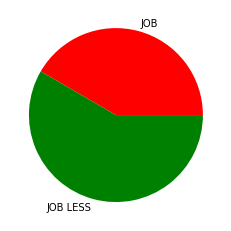

In [12]:
j=[i for i in dfs['JOB']]
plt.pie([j.count(1),j.count(0)],labels=['JOB','JOB LESS'],colors=['r','g'])

In [13]:
#CREATING X AND Y VARIABLES
x=dfs[['INTERNSHIP COUNT','MODE OF INTERVIEW','COMMUNICATION', 'PRESENTATION','SkillPercentage','Mode of the entrance exam','ROUNDS COUNT']]
y=dfs['JOB']

In [14]:
from sklearn.model_selection import train_test_split
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.25,random_state=3)

In [15]:
x_tr.dtypes

INTERNSHIP COUNT               int64
MODE OF INTERVIEW              int64
COMMUNICATION                  int32
PRESENTATION                   int32
SkillPercentage              float64
Mode of the entrance exam      int64
ROUNDS COUNT                   int32
dtype: object

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtree=DecisionTreeClassifier()

model=dtree.fit(x_tr,y_tr)

y_pred=model.predict(x_ts)

y_ts=np.array(y_ts).reshape(-1)

print(y_pred)

accuracy_score(y_ts,y_pred)

[1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0
 1 0 0 1 0 1 0 0 0 0]


0.6808510638297872

In [17]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100,random_state=0)
model=regressor.fit(x_tr,y_tr)
y_pred=model.predict(x_ts)
y_ts=np.array(y_ts).reshape(-1)
print(y_pred)
regressor.score(x_ts,y_ts)

[0.935      0.64602381 0.4625     0.14       0.55       0.
 0.64602381 0.54483333 0.605      0.         0.58783333 0.
 0.19714286 0.795      0.90086905 0.         0.54483333 0.31
 0.01175    0.56380952 0.55       0.9685     0.89166667 0.
 0.61583333 0.785      0.04       0.01       0.58869048 0.89166667
 0.66516667 0.94833333 0.55633333 0.73166667 0.58783333 0.55633333
 0.1647904  0.55       0.1647904  0.23       0.92666667 0.
 0.98       0.03047619 0.46       0.07       0.07      ]


0.4353501065812855

In [18]:
from sklearn.linear_model import LogisticRegression 
clf = LogisticRegression(random_state=0, solver='lbfgs',max_iter=1000).fit(x_tr,y_tr)
y_pred=model.predict(x_ts)
y_ts=np.array(y_ts).reshape(-1)
print(y_pred)
clf.score(x_ts, y_ts)

[0.935      0.64602381 0.4625     0.14       0.55       0.
 0.64602381 0.54483333 0.605      0.         0.58783333 0.
 0.19714286 0.795      0.90086905 0.         0.54483333 0.31
 0.01175    0.56380952 0.55       0.9685     0.89166667 0.
 0.61583333 0.785      0.04       0.01       0.58869048 0.89166667
 0.66516667 0.94833333 0.55633333 0.73166667 0.58783333 0.55633333
 0.1647904  0.55       0.1647904  0.23       0.92666667 0.
 0.98       0.03047619 0.46       0.07       0.07      ]


0.8297872340425532

MEASURING ACCURACY

In [19]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier().fit(x_tr,y_tr)
y_pred=model.predict(x_ts)
y_ts=np.array(y_ts).reshape(-1)
print(y_pred)
accuracy_score(y_ts,y_pred)

[1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0
 0 0 0 1 0 1 0 0 0 0]


0.7659574468085106

In [20]:
from sklearn import svm
model=svm.SVC(kernel='linear').fit(x_tr,y_tr)
y_pred=model.predict(x_ts)
y_ts=np.array(y_ts).reshape(-1)
print(y_pred)
accuracy_score(y_ts,y_pred)

[1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0
 0 0 0 1 0 1 0 1 0 0]


0.8297872340425532

A beeter visualization of SVM is possible only when it deals with 2-D dimensional data .Here the data is multidimensional so regular patter for visualization might not work.

In [21]:
#visualizing the results of SVM with 2 columns
# Get support vector indices
support_vector_indices = model.support_
print(support_vector_indices)

[  4  12  19  28  30  34  35  36  37  44  46  49  54  55  60  61  62  63
  69  70  73  74  77  80  89  90  92  97  98 107 108 113 116 117 120 123
 126 127   0   2   3   5   7  10  16  17  20  22  29  32  39  45  48  50
  51  52  58  59  64  66  72  76  81  96 104 105 106 109 112 122 124 132
 137]


In [22]:
# Get number of support vectors per class
support_vectors_per_class = model.n_support_
print(support_vectors_per_class)

[38 35]


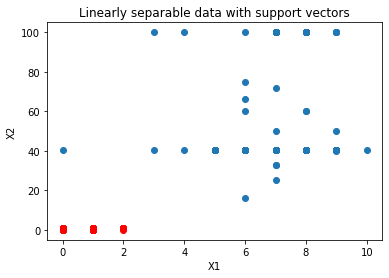

In [23]:
# Get support vectors themselves
support_vectors = model.support_vectors_

# Visualize support vectors
plt.scatter(x_tr.iloc[:,2], x_tr.iloc[:,4])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Applying dimensionality reduction algorithms for visualization

In [24]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x_tr)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3,4,5,6
0,-13.800618,10.048173,2.762361,1.328050,0.105660,-0.680353,0.024631
1,-13.722784,-1.572348,-0.402723,0.332882,-0.771375,-0.459794,0.387250
2,-13.707214,-0.837920,-0.771831,0.939257,0.043707,-0.115050,-0.695910
3,-13.756583,-1.473629,0.196631,-0.702601,0.589316,0.830028,0.180993
4,-13.643650,-0.855415,-2.178196,2.574817,0.149426,-0.516987,-0.283590


In [25]:
explained_variance = pca.explained_variance_ratio_
explained_variance   #sum of these array values is 0

array([9.88529049e-01, 5.87423613e-03, 2.38866871e-03, 2.15593043e-03,
       5.90674605e-04, 3.08902298e-04, 1.52538992e-04])

In [26]:
x_pca["target"]=y_tr
x_pca.columns = ["PC1","PC2","PC3","PC4","PC5","PC6","PC7","target"]
x_pca["target"]

0      1.0
1      0.0
2      0.0
3      NaN
4      NaN
      ... 
133    0.0
134    0.0
135    NaN
136    1.0
137    0.0
Name: target, Length: 138, dtype: float64

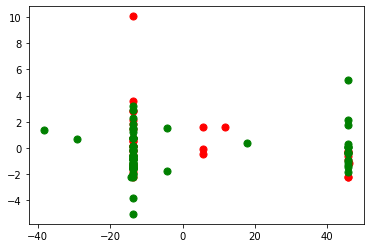

In [27]:
#printing output using the reduced data
targets = [1,0]
colors = ["r", "g"]
for target, color in zip(targets,colors):
    indicesToKeep = x_pca["target"] == target
    plt.scatter(x_pca.loc[indicesToKeep, "PC1"]
     , x_pca.loc[indicesToKeep, "PC2"]
     , c = color
     , s = 50)

In [28]:
accuracy_score(y_ts,y_pred)

0.8297872340425532

In [29]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB().fit(x_tr, y_tr) 
y_pred=model.predict(x_ts)
print(y_pred)
accuracy_score(y_ts,y_pred)

[1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0
 0 0 0 1 0 1 0 1 0 0]


0.8297872340425532

PREDICTION USING MODEL

In [30]:
model.predict([[1,1,9,9,70,1,1]])

C:\Users\SIVASRI\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [35]:
ic=int(input('Enter no of interships you did : '))
if(ic>=0):
    mi=int(input('Enter mode of interview(1-online & 0-offline) : '))
    me=int(input('Enter mode of entrance exam(1-online & 0-offline) : '))
    if((mi==1 or mi==0) and (me==0 or me==1)):
        c=int(input('Rate your communication skills (out of 10 like 8.9,2.9) :'))
        p=int(input('Rate your presentation skills (out of 10 like 8.9,2.9) : '))
        if((c>0 and c<=10) and (p>0 and p<=10)):
            st=int(input('Study time (in hours per day) : '))
            if(st>0 and st<=24):
                sp=int(input('Enter your skill percentage required for the job : '))
                if(sp>0 and sp<=100):
                    rc=int(input("Enter no of rounds in the recruitment process : "))
                    print(model.predict([[ic,mi,c,p,sp,me,rc]]))
                    
else:
    print("INVALID DATA")

Enter no of interships you did : 1
Enter mode of interview(1-online & 0-offline) : 1
Enter mode of entrance exam(1-online & 0-offline) : 1
Rate your communication skills (out of 10 like 8.9,2.9) :9
Rate your presentation skills (out of 10 like 8.9,2.9) : 9
Study time (in hours per day) : 3
Enter your skill percentage required for the job : 90
Enter no of rounds in the recruitment process : 2
[1]


C:\Users\SIVASRI\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [32]:
acc_classifiers = [0.8297872340425532,0.7659574468085106,0.8297872340425532,0.6808510638297872,0.4353501065812855,0.8297872340425532]

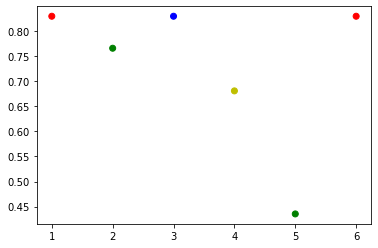

In [33]:
plt.scatter([1,2,3,4,5,6],acc_classifiers,c=["r","g","b","y","g","r"])